<h1> Доверительные интервалы для параметров нормального распределения </h1>
Подключаем необходимые библиотеки

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import math as m

Определяем функции

In [8]:
def mean(data):
    return np.mean(data)

def dispersion_exp(sample):
    return mean(list(map(lambda x: x*x, sample))) - (mean(sample))**2

def normal(size):
    return np.random.standard_normal(size=size)

Реализуем функции 

In [9]:
def task4(x_set : list, n_set : list):
    alpha = 0.05
    m_all = list()
    s_all = list()
    text = "normal"
    for i in range(len(n_set)):
        n = n_set[i]
        x = x_set[i]
        
        m = mean(x)
        s = np.sqrt(dispersion_exp(x))
        
        m1 = [m - s*(stats.t.ppf(1 - alpha/2, n-1))/np.sqrt(n-1), m + s*(stats.t.ppf(1 - alpha/2, n-1))/np.sqrt(n-1)]
        s1 = [s*np.sqrt(n)/np.sqrt(stats.chi2.ppf(1 - alpha/2, n-1)), s*np.sqrt(n)/np.sqrt(stats.chi2.ppf(alpha/2, n-1))]
        
        m_all.append(m1)
        s_all.append(s1)
        
        print("t: %i" % (n))
        print("m: %.2f, %.2f" % (m1[0], m1[1]))
        print("sigma: %.2f, %2.f" % (s1[0], s1[1]))
        
    draw_result(x_set, m_all, s_all, text)
    return

In [10]:
def task4_asymp(x_set : list, n_set : list):
    alpha = 0.05
    m_all = list()
    s_all = list()
    text = "asymp"
    for i in range(len(n_set)):
        n = n_set[i]
        x = x_set[i]

        m = mean(x)
        s = np.sqrt(dispersion_exp(x))

        m_as = [m - stats.norm.ppf(1-alpha / 2)/np.sqrt(n), m + stats.norm.ppf(1 - alpha / 2)/np.sqrt(n)]
        e = (sum(list(map(lambda el: (el-m)**4, x)))/n)/s**4 - 3
        s_as = [s/np.sqrt(1+stats.norm.ppf(1-alpha / 2)*np.sqrt((e+2)/n)), s/np.sqrt(1-stats.norm.ppf(1-alpha / 2)*np.sqrt((e+2)/n))]

        m_all.append(m_as)
        s_all.append(s_as)

        print("m asymptotic :%.2f, %.2f" % (m_as[0], m_as[1]))
        print("sigma asymptotic: %.2f, %.2f" % (s_as[0], s_as[1]))
    draw_result(x_set, m_all, s_all, text)
    return

In [11]:
def draw_result(x_set : list, m_all : float, s_all : list, text):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    
    m_left20 = [m_all[0][0], m_all[0][0]]
    m_right20 = [m_all[0][1], m_all[0][1]]
    m_left100 = [m_all[1][0], m_all[1][0]]
    m_right100 = [m_all[1][1], m_all[1][1]]
    
    d_left20 = [m_all[0][0] - s_all[0][1], m_all[0][0] - s_all[0][1]]
    d_right20 = [m_all[0][1] + s_all[0][1], m_all[0][1] + s_all[0][1]]
    d_left100 = [m_all[1][0] - s_all[1][1], m_all[1][0] - s_all[1][1]]
    d_right100 = [m_all[1][1] + s_all[1][1], m_all[1][1] + s_all[1][1]]

    # draw hystograms
    #for 20
    ax1.set_ylim(0, 1.4)
    ax1.hist(x_set[0], density=True, histtype='stepfilled', alpha=0.2, label='N(0, 1) hyst n=20')
    ax1.legend(loc='best', frameon=True)
    ax1.plot(m_left20, [0, 0.8], 'ro-', label='min \mu, max \mu')
    ax1.plot(m_right20, [0, 0.8], 'ro-')
    ax1.plot(d_left20, [0, 0.8], 'bo-', label='min \mu — max \sigma, max \mu+ max \sigma')
    ax1.plot(d_right20, [0, 0.8], 'bo-')
    ax1.legend()
    
    #for 100
    ax2.set_ylim(0, 1.4)
    ax2.hist(x_set[1], density=True, histtype='stepfilled', alpha=0.2, label='N(0, 1) hyst n=100')
    ax2.legend(loc='best', frameon=True)
    ax2.plot(m_left100, [0, 0.8], 'ro-', label='min \mu, max \mu')
    ax2.plot(m_right100, [0, 0.8], 'ro-')
    ax2.plot(d_left100, [0, 0.8], 'bo-', label='min \mu — max \sigma, max \mu+ max \sigma')
    ax2.plot(d_right100, [0, 0.8], 'bo-')
    ax2.legend()

    # draw intervals of m
    ax3.set_ylim(0.9, 1.4)
    ax3.plot(m_all[0], [1, 1], 'ro-', label='sigma interval n = 20')
    ax3.plot(m_all[1], [1.1, 1.1], 'bo-', label='sigma interval n = 100')
    ax3.legend()
    
    # draw intervals of sigma
    ax4.set_ylim(0.9, 1.4)
    ax4.plot(s_all[0], [1, 1], 'ro-', label='sigma interval n = 20')
    ax4.plot(s_all[1], [1.1, 1.1], 'bo-', label='sigma interval n = 100')
    ax4.legend()
    
    plt.rcParams["figure.figsize"] = (25,5)
    plt.savefig(text + '.jpg', format='jpg')
    plt.show()
    return

t: 20
m: -0.87, 0.33
sigma: 0.97,  2
t: 100
m: -0.23, 0.16
sigma: 0.87,  1


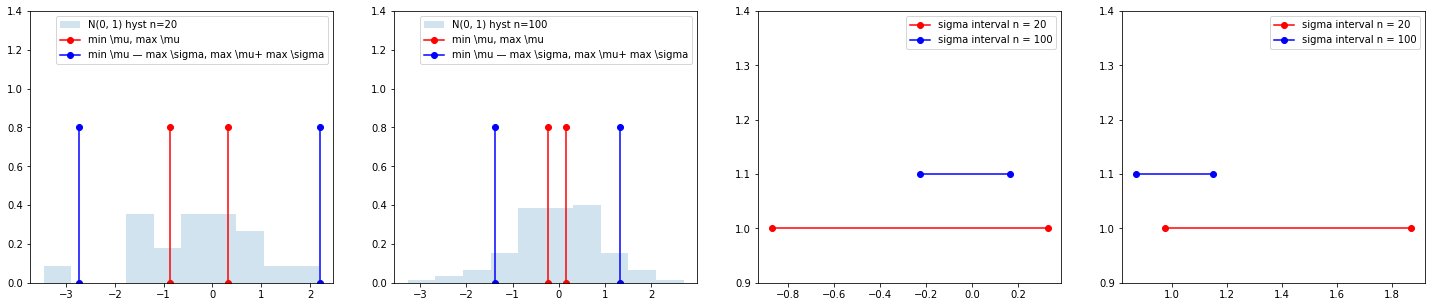

m asymptotic :-0.71, 0.17
sigma asymptotic: 0.96, 2.20
m asymptotic :-0.23, 0.16
sigma asymptotic: 0.86, 1.19


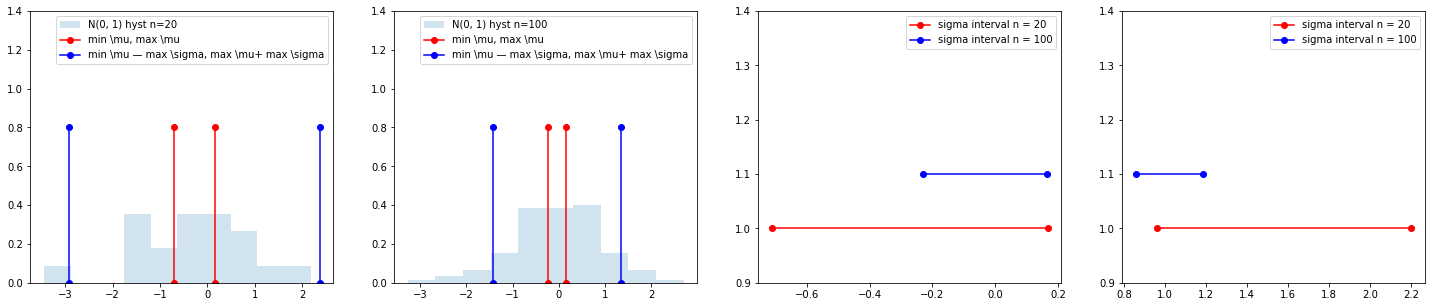

In [12]:
def task4_builder():
    n_set = [20, 100]
    x_20 = normal(20)
    x_100 = normal(100)
    x_set = [x_20, x_100]
    task4(x_set, n_set)
    task4_asymp(x_set, n_set)
    return

task4_builder()